# Exact Diagonalisation of Spin Hamiltonians
https://quspin.github.io/QuSpin/examples/example0.html#example0-label

In [2]:
from quspin.operators import hamiltonian  # Hamiltonians and operators
from quspin.basis import spin_basis_1d  # Hilbert space spin basis
import numpy as np  # generic math functions
import matplotlib.pyplot as plt # matplotlib

In [4]:
def energy( L , mag, J ) :
    #
    ##### define model parameters #####
    Jxy = 1.0  # xy interaction
    Jzz_0 = J  # zz interaction
    hz = 0.0  # z external field
    #
    ##### set up Heisenberg Hamiltonian in an external z-field #####
    # compute spin-1/2 basis
    # basis = spin_basis_1d(L,pauli=False)
    # basis = spin_basis_1d(L,pauli=False,Nup=L//2) # zero magnetisation sector
    basis = spin_basis_1d(
        L, pauli=False, Nup=mag+L//2, pblock=1 # Nup is the number of spin up
    )  # and positive parity sector
    # define operators with OBC using site-coupling lists
    J_zz = [[Jzz_0, i, i + 1] for i in range(L - 1)]  # OBC
    J_xy = [[Jxy / 2.0, i, i + 1] for i in range(L - 1)]  # OBC
    h_z = [[hz, i] for i in range(L)]
    # static and dynamic lists
    static = [["+-", J_xy], ["-+", J_xy], ["zz", J_zz], ["z", h_z]]
    dynamic = []
    # compute the time-dependent Heisenberg Hamiltonian
    H_XXZ = hamiltonian(static, dynamic, basis=basis, dtype=np.float64, check_symm=False, check_herm=False, check_pcon=False)
    #
    ##### various exact diagonalisation routines #####
    # calculate entire spectrum only
    E = H_XXZ.eigvalsh()
    # calculate full eigensystem
    E, V = H_XXZ.eigh()
    # calculate minimum and maximum energy only
    Emin, Emax = H_XXZ.eigsh(k=2, which="BE", maxiter=1e4, return_eigenvectors=False)
    # calculate the eigenstate closest to energy E_star
    E_star = 0.0
    E, psi_0 = H_XXZ.eigsh(k=1, sigma=E_star, maxiter=1e4)
    psi_0 = psi_0.reshape((-1,))

    return Emin

In [5]:
def energy_gap(L,J):
    return energy(L,1,J) - energy(L,0,J)

In [6]:
energy_gap(12,1)

np.float64(0.6287996825623603)

In [7]:
values = np.array(
    [ [ [ 1/x , y , energy_gap(x,y) ] for x in range(8,16+1,4)] for y in range(1,10+1,1) ] 
    )

In [8]:
values

array([[[ 0.125     ,  1.        ,  0.87120353],
        [ 0.08333333,  1.        ,  0.62879968],
        [ 0.0625    ,  1.        ,  0.49081927]],

       [[ 0.125     ,  2.        ,  1.22649436],
        [ 0.08333333,  2.        ,  0.9017846 ],
        [ 0.0625    ,  2.        ,  0.71595571]],

       [[ 0.125     ,  3.        ,  1.58438925],
        [ 0.08333333,  3.        ,  1.21989992],
        [ 0.0625    ,  3.        ,  1.02623356]],

       [[ 0.125     ,  4.        ,  1.98348567],
        [ 0.08333333,  4.        ,  1.61838875],
        [ 0.0625    ,  4.        ,  1.43575273]],

       [[ 0.125     ,  5.        ,  2.418615  ],
        [ 0.08333333,  5.        ,  2.0615861 ],
        [ 0.0625    ,  5.        ,  1.88733347]],

       [[ 0.125     ,  6.        ,  2.87587382],
        [ 0.08333333,  6.        ,  2.52620502],
        [ 0.0625    ,  6.        ,  2.35744253]],

       [[ 0.125     ,  7.        ,  3.34623963],
        [ 0.08333333,  7.        ,  3.00214887],
        

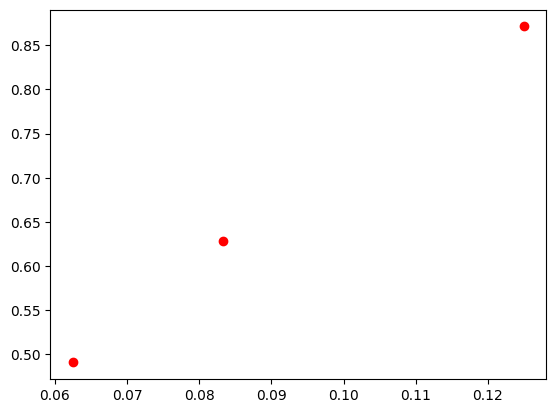

In [67]:
plt.plot(values[:,0],values[:,1], 'ro')
plt.show()

Do a fit f(x)=a+xb+x^2c and plot the gap at the thermodynamic limit (x=0) as a function of J.

In [68]:
values

array([[0.125     , 0.87120353],
       [0.08333333, 0.62879968],
       [0.0625    , 0.49081927]])